# Notebook 2-4: Plot HMM Network Dynamics

In this notebook we will cover:
1. **Summary statistics visualisation**: We will compute and visualise summary statistics of the state time courses.

## 1. Summary statistics visualisation
In this section we will compute
- Fractional occupancy
- Lifetime
- Interval time
- Switching rate

of the state time courses.

Exercise:
Where can you find information on what these statistics mean and how they are computed?

First we load the posterior state probabilities $\alpha$ and turn them into state time courses

In [1]:
import pickle
from osl_dynamics.inference import modes

alp = pickle.load(open("results/inf_params/alp.pkl", "rb"))
stc = modes.argmax_time_courses(alp)

Next we compute the summary statistics.

In [2]:
import os
import numpy as np

fo = modes.fractional_occupancies(stc)
lt = modes.mean_lifetimes(stc, sampling_frequency=250)
intv = modes.mean_intervals(stc, sampling_frequency=250)
sr = modes.switching_rates(stc, sampling_frequency=250)

sum_stats_dir = "results/summary_stats"
os.makedirs(sum_stats_dir, exist_ok=True)
np.save(f"{sum_stats_dir}/fo.npy", fo)
np.save(f"{sum_stats_dir}/lt.npy", lt)
np.save(f"{sum_stats_dir}/intv.npy", intv)
np.save(f"{sum_stats_dir}/sr.npy", sr)

At last we visualise the summary statistics.

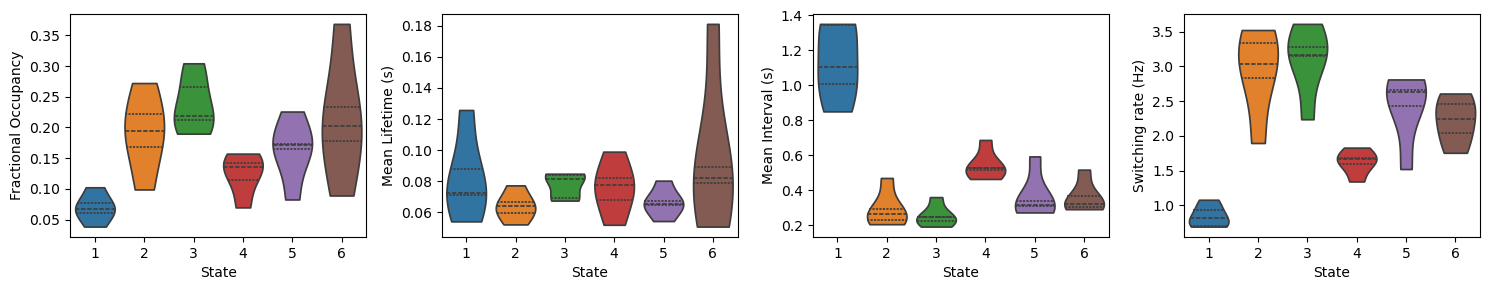

In [3]:
from osl_dynamics.utils import plotting

fig, ax = plotting.plot_hmm_summary_stats(
    fo, lt, intv, sr
)
fig.savefig(f"{sum_stats_dir}/sum_stats.png")